## Project theme: Recommendation systems

###### Our Goal
- In this notebook, we built a [collaborative filtering] based model (https://en.wikipedia.org/wiki/Collaborative_filtering) `Recommender System` by applying different approaches to provide meaningful `Resturant recommendations` from `TripAdvisor Website`.

###### About Data
- For our project, we choose dataset from `TripAdvisor` having restaurant data across 5 major states in USA from [`kaggle`](https://www.kaggle.com/datasets/siddharthmandgi/tripadvisor-restaurant-recommendation-data-usa).
- This dataset was scraped from the TripAdvisor website and it conatins restaurant data across 20 cities in Washington, Texas, California, New York, Pennsylvania, Oregon and New Jersey.

*Note:* Our dataset files can be also accessible here on [github](https://github.com/sifat-e-noor/Recommendation-system).

###### Our work    
To build our [collaborative filtering] based model (https://en.wikipedia.org/wiki/Collaborative_filtering) recommendation system we applied the followings approaches:
- Find top rated similar resturants based on customers Reviews, No. of Reviews, and Price_Range using using K-Means.
- Find top similar resturants based on K-Means resultant restaurents customers' comments of using Jaccard Similarity.
- Find the most important words in similar resturants using TF-IDF to robust its keyword based search query in Search Engines.
- Recommend 10 postively reviewd similar restaurents using Sentiment Analysis from top similar resturants results of Jaccard Similarity. 

*Note:* Our codebase file can be accessible here on [github](https://github.com/sifat-e-noor/Recommendation-system).

## Recommending and Analyzing Similar Resturants Using Jaccard Similarity and TF-IDF

##### All important import(s) goes here

In [1]:
import csv 
import json 
import os
import matplotlib.pyplot as plt
import nltk
import numpy as np
import mmh3
import pandas as pd
import re
import requests
import seaborn as sns
from wordcloud import WordCloud

nltk.download('all') 
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from nltk.corpus import opinion_lexicon
from nltk import word_tokenize
from nltk.corpus import stopwords 
from nltk import FreqDist 
unwanted = nltk.corpus.stopwords.words("english")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk import pos_tag
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from textblob import TextBlob

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package basqu

[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nps_chat is already up-to-date!
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package omw is already up-to-date!
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users

[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package words is already up-to-date!
[nltk_data]    | Downloading package ycoe to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ycoe is already up-to-date!
[nltk_data]    | 
[nltk_data]  Done downloading collection all
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt 

###### Download dataset (.csv) file from github

In [2]:
# Functin to download file from github
def file_exist(file_name):
    return file_name in os.listdir(os.getcwd())
def download_file(url,file_name):
    if file_exist(file_name):
        return
    response = requests.get(url)
    open(file_name, "wb").write(response.content)

In [3]:
# Load the dataset from git
url = "https://raw.githubusercontent.com/sifat-e-noor/Recommendation-system/main/Data/TripAdvisor_RestauarantRecommendation_cleandataset.csv"
download_file(url,"TripAdvisor_RestauarantRecommendation_cleandataset.csv")
df_dataset = pd.read_csv("TripAdvisor_RestauarantRecommendation_cleandataset.csv")

# Drop the index column from the downloaded dataset
df_dataset = df_dataset.drop(['Unnamed: 0'], axis=1)

# View the dataset's first 3 data
print(f"Our dataset's first 3 data:")
df_dataset.head(3)

# View full dataset
# df_dataset

Our dataset's first 3 data:


,Name,Street_Address,State,City,Zip_Code,Type,Reviews,No_of_Reviews,Comments,Price_Range
0,Coach House Diner,55 State Rt 4,NJ,Hackensack,07601-6337,"Diner, American, Vegetarian Friendly",4.0,84,"Both times we were there very late, after 11 P...",Medium
1,Table Talk Diner,2521 South Rd Ste C,NY,Poughkeepsie,12601-5476,"American, Diner, Vegetarian Friendly",4.0,256,Waitress was very friendly but a little pricey...,Medium
2,Sixty Vines,3701 Dallas Pkwy,TX,Plano,75093-7777,"American, Wine Bar, Vegetarian Friendly",4.5,235,Not sure why I went there for the second time....,Medium


In [4]:
# Obtain basic info of dataset 
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439 entries, 0 to 2438
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            2439 non-null   object 
 1   Street_Address  2439 non-null   object 
 2   State           2439 non-null   object 
 3   City            2439 non-null   object 
 4   Zip_Code        2439 non-null   object 
 5   Type            2439 non-null   object 
 6   Reviews         2439 non-null   float64
 7   No_of_Reviews   2439 non-null   int64  
 8   Comments        2439 non-null   object 
 9   Price_Range     2439 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 190.7+ KB


#### Find top rated similar resturants based on customers Reviews, No. of Reviews, and Price_Range using using K-Means.

In [39]:
# Assign df_dataset to new_df to apply Price_Range condition for K-means
new_df = df_dataset

In [40]:
# Reformat Price_Range column's value
def price_range(price_value):
    if price_value == 'Cheap':
        return 5
    elif price_value == 'Medium':
        return 3
    else:
        return 1

new_df['Price_Score'] = new_df['Price_Range'].apply(price_range)

In [7]:
# Group by different States
group = new_df.groupby('State')

In [8]:
# Define Functions for K-Means 
def names_by_state(state):
    if state == 'NJ':
        df_state = pd.DataFrame(list(group)[0][1])
    elif state == 'NY':
        df_state = pd.DataFrame(list(group)[1][1])
    elif state == 'OR':
        df_state = pd.DataFrame(list(group)[2][1])
    elif state == 'PA':
        df_state = pd.DataFrame(list(group)[3][1])
    elif state == 'TX':
        df_state = pd.DataFrame(list(group)[4][1])
    elif state == 'WA':
        df_state = pd.DataFrame(list(group)[5][1])
    
    # 'Reviews', 'No_of_Reviews', 'Price_Score', extract them and put them into an array in order to do min_max scaler
    data = np.vstack((df_state['Reviews'].values,df_state['No_of_Reviews'].values, df_state['Price_Score'].values)).T
    
    # Min_Max Scaler [0, 1]
    min_max_scaler=preprocessing.MinMaxScaler()
    train_x = min_max_scaler.fit_transform(data)

    # k_means
    model = KMeans(n_clusters=3)
    model.fit(train_x)
    predict_y = model.predict(train_x)
    
    # get the cluster result and add it into dataframe
    df_state['Kmeans_Prediction'] = pd.DataFrame(predict_y)
    
    # find the top resteruants' names of this state
    for i in df_state.Kmeans_Prediction:
        if i == 0:
            top_names = df_state.loc[df_state.Kmeans_Prediction == i]['Name']
            return top_names

In [9]:
# Find similar restaurents for given _input state with highest reviews
State = 'NJ'
top_NJ_restaurents = names_by_state(State)

E:\Software-Installed\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [10]:
# Convert top_NJ_restaurents to dataframe
top_NJ_restaurents = top_NJ_restaurents.to_frame()
top_NJ_restaurents

,Name
0,Coach House Diner
12,Red Eye Cafe
17,Breadsticks Cafe & Grill
29,Moore's Tavern & Restaurant
44,Bisque Restaurant
74,Metropolitan Cafe
83,Jon & Patty's Coffee Bar & Bistro
100,Pj's Pancake House
144,Ready's Coffee Shop & Restaurant
151,Lamberti's Tutti Toscani


The above part is able to predict the similar restauratns with highest reviews for a given _input state 
  - Input:
        - state's name as query 
  - Return:
        - dataframe of similar type of restaurents name based on users' highest Reviews

#### Find top similar resturants based on K-Means resultant restaurents customers' comments of using Jaccard Similarity.

In [11]:
# Find a specific state with the resturants Name, Type and Comments
df_NJstate_resturant_comment = df_dataset[df_dataset['State'] == 'NJ'][['Name','State','Type', 'Comments']]

In [12]:
# Find the resturants' unique Names 
df_NJ_unique_resturant = pd.DataFrame(df_NJstate_resturant_comment.Name.unique(), columns =["Name"])
df_NJ_unique_resturant.head(6)

,Name
0,Coach House Diner
1,Red Eye Cafe
2,Winberies Princeton
3,Breadsticks Cafe & Grill
4,BV Tuscany Italian Restaurant
5,Social 37


In [13]:
# Merge all comments as per resturants' Name
def prepare_doc_for_resturant_comments(resturant_name):
    return " ".join(df_NJstate_resturant_comment[df_NJstate_resturant_comment["Name"]==resturant_name]["Comments"].tolist())

df_NJ_unique_resturant["allcomments"] = df_NJ_unique_resturant['Name'].apply(prepare_doc_for_resturant_comments) 
df_NJ_unique_resturant

,Name,allcomments
0,Coach House Diner,"Both times we were there very late, after 11 P..."
1,Red Eye Cafe,My first time in this part of Montclair. Since...
2,Winberies Princeton,We brought our family here for dinner on a Sat...
3,Breadsticks Cafe & Grill,We dined for lunch (group of four) and all ord...
4,BV Tuscany Italian Restaurant,BV Tuscany is in a great location with shops a...
...,...,...
499,Chick's Deli,A hole in the wall with great food. Aren't the...
500,Uncle Bill's Pancake House,Called restaurant at the last minute to see if...
501,BRIO Tuscan Grille,We come to Brio once a month. They are good fo...
502,Maywood Pancake house,Stopped in yesterday for Breakfast. When in Je...


In [14]:
# Find allcomments for top_NJ_restaurents
list1 = list(top_NJ_restaurents['Name'])
list2 = []
for i, row in df_NJ_unique_resturant.iterrows():    
    if df_NJ_unique_resturant.at[i,'Name'] in list1:
            list2.append(df_NJ_unique_resturant.at[i,'allcomments'])

In [15]:
# Get allcomments for top_NJ_restaurents
k_means_similar_restaurents = pd.DataFrame(list(zip(list1, list2)),
               columns =['Name', 'allcomments'])
k_means_similar_restaurents

,Name,allcomments
0,Coach House Diner,"Both times we were there very late, after 11 P..."
1,Red Eye Cafe,My first time in this part of Montclair. Since...
2,Breadsticks Cafe & Grill,We dined for lunch (group of four) and all ord...
3,Moore's Tavern & Restaurant,On Tuesdays Moore's has 2 for 1 burgers. The b...
4,Bisque Restaurant,"Three star restaurant, open all year BYOB.Clas..."
5,Metropolitan Cafe,"Metropolitan cafe is dependable, always has fr..."
6,Jon & Patty's Coffee Bar & Bistro,Welcoming and trendy setting with creative twi...
7,Pj's Pancake House,have been to PJ's many times in person and thr...
8,Ready's Coffee Shop & Restaurant,"Upon reading this review, please don’t tell an..."
9,Lamberti's Tutti Toscani,The bread is always the best! We had the prosc...


In [16]:
# Remove stowords from all_comments
def remove_stopwords(doc):
    doc_text = nltk.word_tokenize(doc)
    stopwords = nltk.corpus.stopwords.words('english')
    doc_text = " ".join([token.lower() for token in doc_text if token.isalpha() and token.lower() not in stopwords])
    return doc_text

k_means_similar_restaurents["allcomments"] = k_means_similar_restaurents["allcomments"].apply(remove_stopwords)

In [17]:
# Convert dataframe to dict
data_dict = {}

for name, comment in zip(k_means_similar_restaurents["Name"], k_means_similar_restaurents["allcomments"]):
    data_dict[name] = comment    

In [18]:
# Hashes a list of strings
def listhash(l,seed):
    val = 0
    for e in l:
        val = val ^ mmh3.hash(e, seed)
    return val 

In [19]:
# Get minhash of given shingles
def minhash1(shingles_list, seed):
    minhash_value = None
    for aShingle in shingles_list:
        hashcode = listhash([aShingle], seed)
        if minhash_value == None or hashcode < minhash_value:
            minhash_value = hashcode
    return minhash_value

In [20]:
# Get sequence of k minhashes
def minhash2(shingles_list, k):
    all_minhash = []
    for i in range(k):
        all_minhash.append(minhash1(shingles_list, i))
    return all_minhash

In [21]:
# Get list of unique shingles
def shingle(aString, q, delimiter=' '):
    all_shingles = []
    if delimiter != '':
        words_list = aString.split(delimiter)
    else:
        words_list = aString
    for i in range (len(words_list)-q+1):
        all_shingles.append(delimiter.join(words_list[i:i+q]))
    return list(set(all_shingles))

In [22]:
# Get dictionary consisting of document id’s as keys and signatures as values
q = 1 # length of shingle
k = 100 # number of minhashes
def signature(dict_docs, q = q, num_hashes = k):
    dict_signatures = {}
    total_texts = len(list(dict_docs.keys()))
    counter = 1
    for key,text in dict_docs.items():
        print(f'{counter}/{total_texts} - {key} - Processing...')
        doc_shingles = shingle(text, q)
        minhash_values = minhash2(doc_shingles, num_hashes)
        dict_signatures[key] = minhash_values
        counter += 1
    return dict_signatures

In [23]:
dict_signatures_docs = signature(data_dict)

1/53 - Coach House Diner - Processing...
2/53 - Red Eye Cafe - Processing...
3/53 - Breadsticks Cafe & Grill - Processing...
4/53 - Moore's Tavern & Restaurant - Processing...
5/53 - Bisque Restaurant - Processing...
6/53 - Metropolitan Cafe - Processing...
7/53 - Jon & Patty's Coffee Bar & Bistro - Processing...
8/53 - Pj's Pancake House - Processing...
9/53 - Ready's Coffee Shop & Restaurant - Processing...
10/53 - Lamberti's Tutti Toscani - Processing...
11/53 - Mediterra Restaurant - Processing...
12/53 - White Manna - Processing...
13/53 - Satis Bistro - Processing...
14/53 - Caffe Aldo Lamberti - Processing...
15/53 - Chengdu 23 - Processing...
16/53 - Chart House - Processing...
17/53 - Mikonos Restaurant - Processing...
18/53 - Broadway Burger Bar - Processing...
19/53 - Zaytouna Mediterranean Grill - Processing...
20/53 - Villa Gennaros - Processing...
21/53 - River Rock Restaurant and Marina Bar - Processing...
22/53 - Anthony's Coal Fired Pizza - Processing...
23/53 - LouCas

In [24]:
# Find similar resturants of a given _input resturant
def jaccard(name1,name2,dict_signatures_docs):
    signatures_doc1 = np.array(dict_signatures_docs[name1])
    signatures_doc2 = np.array(dict_signatures_docs[name2])
    return len(np.intersect1d(signatures_doc1, signatures_doc2))/len(np.union1d(signatures_doc1, signatures_doc2))  

_input="Coach House Diner"
def apply_jaccard_(name):
     return jaccard(_input,name,dict_signatures_docs)
k_means_similar_restaurents["Jaccard_Similarity"]=k_means_similar_restaurents["Name"].apply(apply_jaccard_)
# Buddakan
print(f'Results of first ten similar restaurents using Jaccard similarity between {_input} and other {len(df_NJ_unique_resturant.Name)} resturants of New Jersy State:')
k_means_similar_restaurents[:11]

Results of similar restaurents using Jaccard similarity between Coach House Diner and other 504 resturants of New Jersy State:


,Name,allcomments,Jaccard_Similarity
0,Coach House Diner,times late pm time many diners forget restaura...,1.000000
1,Red Eye Cafe,first time part montclair since arrived pm nev...,0.086957
2,Breadsticks Cafe & Grill,dined lunch group four ordered offering excell...,0.030928
3,Moore's Tavern & Restaurant,tuesdays moore burgers burgers good large serv...,0.063830
4,Bisque Restaurant,three star restaurant open year elegant dining...,0.000000
5,Metropolitan Cafe,metropolitan cafe dependable always fresh deli...,0.025641
6,Jon & Patty's Coffee Bar & Bistro,welcoming trendy setting creative twists even ...,0.000000
7,Pj's Pancake House,pj many times person delivery food always fres...,0.063830
8,Ready's Coffee Shop & Restaurant,upon reading review please tell anybody secret...,0.015228
9,Lamberti's Tutti Toscani,bread always best prosciutto flatbread savory ...,0.000000


In [25]:
# Convert Jaccard_Similarity column's data to float
k_means_similar_restaurents['Jaccard_Similarity'] = k_means_similar_restaurents['Jaccard_Similarity'].apply(float)

In [26]:
# Rename k_means_similar_restaurents to JaccardSimilarity_similar_resturants for our understanding to keep align with system flow
JaccardSimilarity_similar_resturants = k_means_similar_restaurents

The above part is able to predict the similar restauratns for a specific restaurent query from any state
  - Input:
        - resturant name as query 
  - Return:
        - dataframe of similar type of restaurents name based on users' comments

#### Find the most important words in similar resturants using TF-IDF to robust its keyword based search query in Search Engines.

We looked for important words among the JaccardSimilarity_top_ten_similar_resturants and k_means_top_10_similar_restaurents to analyze that whether the search keywords will help to appear these recommendations in search engines for these queries mention in above (Search by secfic restaurant name) and whether the above similarity among resturants are in positive cluster or negative.

In [27]:
# Find important words from resturants all_comments
tfidf_vectorizer = TfidfVectorizer(ngram_range=[1, 1])

tfidf_separate = tfidf_vectorizer.fit_transform(JaccardSimilarity_similar_resturants['allcomments'])

word_list = tfidf_vectorizer.get_feature_names_out()

count_list = tfidf_separate.toarray().sum(axis=0)

vocab_df = pd.DataFrame((zip(word_list,count_list)),
                          columns= ["vocab","tfidf_value"])
# vocab_df
vocab_df.sort_values(by="tfidf_value",ascending=False)[:31]

,vocab,tfidf_value
205,food,2.998438
236,great,2.249994
231,good,2.244265
152,dinner,1.920960
514,service,1.692740
644,wine,1.597980
137,delicious,1.578654
424,place,1.477831
477,restaurant,1.438146
14,always,1.356319


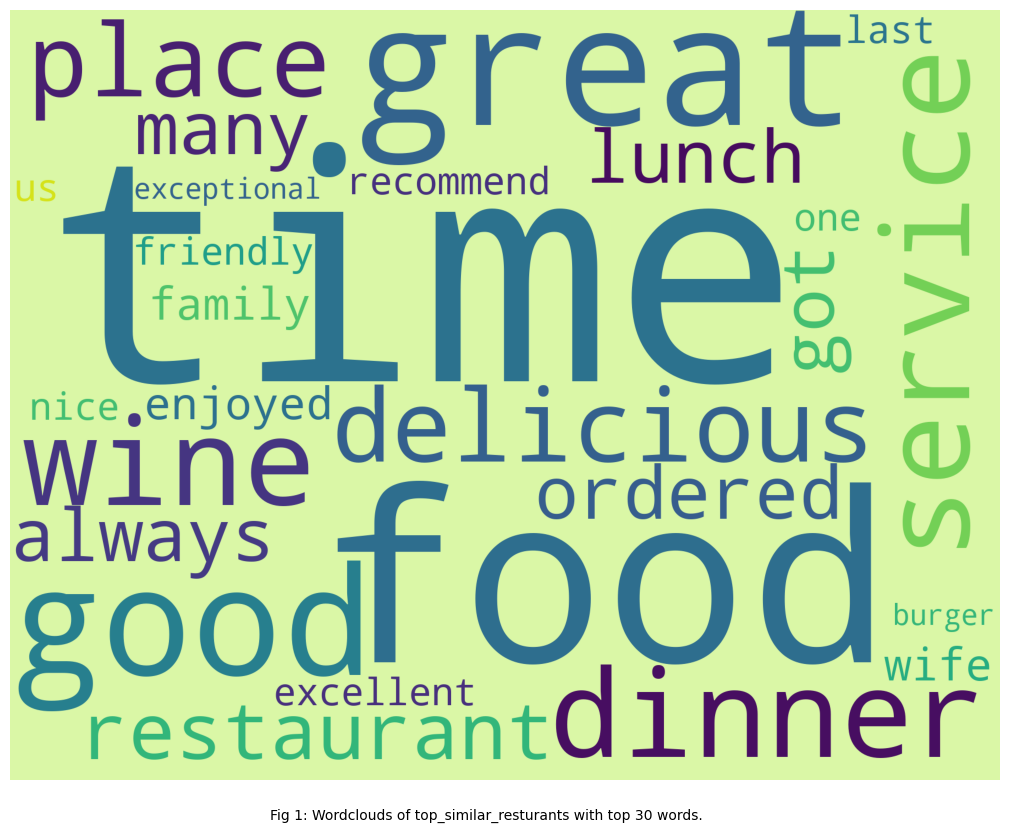

In [38]:
# Visulize important keywords of top ten similar resturants
similar_resturant_comments_JaccardSimilarity = " ".join(vocab_df.sort_values(by="tfidf_value",ascending=False)["vocab"][:31].tolist())

wordcloud = WordCloud(background_color='#DAF7A6',
                      width=1800,
                      height=1400).generate(similar_resturant_comments_JaccardSimilarity)
img=plt.imshow(wordcloud)
plt.figtext(0.5, 0.07,'Fig 1: Wordclouds of top_similar_resturants with top 30 words.', wrap=True, horizontalalignment='center', fontsize=10) 
plt.axis("off")
# Save the file
# plt.savefig("resturants_wordcloud.png")
# Show the wordcloud
plt.show()

#### Recommend 10 postively reviewd similar restaurents using Sentiment Analysis from top similar resturants results of Jaccard Similarity. 

In [29]:
# Define functions for sentiment scores
def tokens(raw):        
    words = nltk.wordpunct_tokenize(raw)   
    nonPunct = re.compile('.*[A-Za-z].*') # must contain a letter or digit
    filter  = [w for w in words if nonPunct.match(w)]    
    words = [word.lower() for word in filter]                
    return words
    
def removal(tags):
    # function that removes stopwords 
    pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
    Pos_tag_list = []
    for word, tag in tags:
        if word not in unwanted:
           Pos_tag_list.append(tuple([word, pos_dict.get(tag[0])]))
           
    return Pos_tag_list

def posTag(text):
    # and tags the words to their POS
    tags = pos_tag(tokens(text))    
    return tags 

def lemmanized(Pos_tagged):
    lemma_com = " "
    for word, pos in Pos_tagged:
        if not pos:
            lemma = word
            lemma_com = lemma_com + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_com = lemma_com + " " + lemma
    return lemma_com 

def getSubjectivity(comment):
    return TextBlob(comment).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(comment):
    return TextBlob(comment).sentiment.polarity

def analysis(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [30]:
# Does tokeninzation and removal of stopwords for each comment in the data from JaccardSimilarity_top_ten_similar_resturants
for i, row in JaccardSimilarity_similar_resturants.iterrows():
    comment = JaccardSimilarity_similar_resturants.at[i,'allcomments']
    JaccardSimilarity_similar_resturants.at[i,'allcomments'] = removal(posTag(comment))

In [31]:
# Get lemmanized parts from JaccardSimilarity_top_ten_similar_resturants comments
JaccardSimilarity_similar_resturants['lem_comments'] = JaccardSimilarity_similar_resturants['allcomments'].apply(lemmanized)
JaccardSimilarity_similar_resturants

,Name,allcomments,Jaccard_Similarity,lem_comments
0,Coach House Diner,"[(times, n), (late, a), (pm, a), (time, n), (m...",1.000000,time late pm time many diner forget restaura...
1,Red Eye Cafe,"[(first, a), (time, n), (part, n), (montclair,...",0.086957,first time part montclair since arrive pm ne...
2,Breadsticks Cafe & Grill,"[(dined, v), (lunch, n), (group, n), (four, No...",0.030928,din lunch group four order offer excellent v...
3,Moore's Tavern & Restaurant,"[(tuesdays, n), (moore, v), (burgers, n), (bur...",0.063830,tuesday moore burger burger good large servi...
4,Bisque Restaurant,"[(three, None), (star, n), (restaurant, n), (o...",0.000000,three star restaurant open year elegant dini...
5,Metropolitan Cafe,"[(metropolitan, a), (cafe, n), (dependable, a)...",0.025641,metropolitan cafe dependable always fresh de...
6,Jon & Patty's Coffee Bar & Bistro,"[(welcoming, v), (trendy, a), (setting, v), (c...",0.000000,welcome trendy set creative twist even basic...
7,Pj's Pancake House,"[(pj, r), (many, a), (times, n), (person, n), ...",0.063830,pj many time person delivery food always fre...
8,Ready's Coffee Shop & Restaurant,"[(upon, None), (reading, v), (review, n), (ple...",0.015228,upon read review please tell anybody secret ...
9,Lamberti's Tutti Toscani,"[(bread, n), (always, r), (best, a), (prosciut...",0.000000,bread always best prosciutto flatbread savor...


In [32]:
# JaccardSimilarity_top_ten_similar_resturants: Polarity – talks about how positive or negative the opinion is
# JaccardSimilarity_top_ten_similar_resturants: Subjectivity – talks about how subjective the opinion is
JaccardSimilarity_similar_resturants['Subjectivity'] = JaccardSimilarity_similar_resturants['lem_comments'].apply(getSubjectivity) 
JaccardSimilarity_similar_resturants['Polarity'] = JaccardSimilarity_similar_resturants['lem_comments'].apply(getPolarity) 
JaccardSimilarity_similar_resturants['Analysis'] = JaccardSimilarity_similar_resturants['Polarity'].apply(analysis)
JaccardSimilarity_similar_resturants.head(3)

,Name,allcomments,Jaccard_Similarity,lem_comments,Subjectivity,Polarity,Analysis
0,Coach House Diner,"[(times, n), (late, a), (pm, a), (time, n), (m...",1.000000,time late pm time many diner forget restaura...,0.550000,0.266667,Positive
1,Red Eye Cafe,"[(first, a), (time, n), (part, n), (montclair,...",0.086957,first time part montclair since arrive pm ne...,0.446667,0.370000,Positive
2,Breadsticks Cafe & Grill,"[(dined, v), (lunch, n), (group, n), (four, No...",0.030928,din lunch group four order offer excellent v...,0.750926,0.350926,Positive


In [33]:
# Sort the resturants according to their Name and there polarity for JaccardSimilarity_top_ten_similar_resturants
Top_rest_NJ_list1 = []
for i, row in JaccardSimilarity_similar_resturants.iterrows():
    t = (i,JaccardSimilarity_similar_resturants.at[i,'Name'],round(JaccardSimilarity_similar_resturants.at[i,'Polarity'],3),round(JaccardSimilarity_similar_resturants.at[i,'Subjectivity'],3))
    Top_rest_NJ_list1.append(t)

Top_rest_NJ_list1 = sorted(Top_rest_NJ_list1, key=lambda tup: tup[2],reverse=True) 

In [34]:
# Recommend positively reviewd similar restaurents from JaccardSimilarity_top_ten_similar_resturants (threshold = 0.5)
Top_NJ_JaccardSimilarity_sentimentanalysis_recommend = pd.DataFrame(Top_rest_NJ_list1, columns=['Index','Restuarant','Love-score','Subjectivity-score'])
Top_NJ_JaccardSimilarity_sentimentanalysis_recommend 

# Top_NJ_JaccardSimilarity_recommend = Top_NJ_JaccardSimilarity.where(Top_NJ_JaccardSimilarity['Love-score']>=0.5)
# Top_NJ_JaccardSimilarity_recommend.dropna()

,Index,Restuarant,Love-score,Subjectivity-score
0,32,Piccini Wood Fired Brick Oven,0.750,0.875
1,31,Sophie's Bistro,0.736,0.698
2,13,Caffe Aldo Lamberti,0.690,0.840
3,9,Lamberti's Tutti Toscani,0.589,0.468
4,18,Zaytouna Mediterranean Grill,0.567,0.800
5,52,Giumarello's,0.560,0.613
6,3,Moore's Tavern & Restaurant,0.538,0.543
7,42,Dusal's Italian Restaurant,0.527,0.747
8,25,Tony P's House of Pie,0.525,0.650
9,40,Sofia's Mediterranean Grill,0.512,0.625


In [35]:
# Recommedation of 10 top rated similar restaurents of "Buddakan" in New jersy
Recommend_top_10_similar_resturants = Top_NJ_JaccardSimilarity_sentimentanalysis_recommend.nlargest(11, 'Love-score')
Recommend_top_10_similar_resturants

,Index,Restuarant,Love-score,Subjectivity-score
0,32,Piccini Wood Fired Brick Oven,0.750,0.875
1,31,Sophie's Bistro,0.736,0.698
2,13,Caffe Aldo Lamberti,0.690,0.840
3,9,Lamberti's Tutti Toscani,0.589,0.468
4,18,Zaytouna Mediterranean Grill,0.567,0.800
5,52,Giumarello's,0.560,0.613
6,3,Moore's Tavern & Restaurant,0.538,0.543
7,42,Dusal's Italian Restaurant,0.527,0.747
8,25,Tony P's House of Pie,0.525,0.650
9,40,Sofia's Mediterranean Grill,0.512,0.625


Therefore, combining all the above parts into one, our enitire model is able to predict the postively reviewd similar restauratns name for a given _input name of a state for any state
  - Input:
        - state name as query 
  - Return:
        - dataframe of similar type of postively reviewd restaurent names using highest sentiment scores
_The whole query filtered by users' highest Reviews, No. of Reviews, Price_Range, comments and postively reviewd comments._

### The End!
##### Thanks for stopping by.